In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Exploratory Data Analysis
   * Loading data.
   * Statistical Summary.
   * Feature Description.
   * Feature Transformation.
   * Feature Visualization.
   * Handling missing value.
   * Handling duplicated entries.
   * Encoding Categorical Features.

In [2]:
# Loading data
df = pd.read_csv('Anonymize_Loan_Default_data.csv', encoding='latin1', index_col=0)
df.head().style.background_gradient(cmap='turbo')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.000000,0.000000,0.000000,36 months,0.000000,0.000000,< 1 year,RENT,0.000000,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.000000,0.000000,Jan-01,0.000000,nan,0.000000,0.000000,0.000000,0.00%,1.000000,0.000000,0.000000,0.000000,0.000000,Jan-07,0.000000,Jan-07,Jan-07,1
3,545583,703644,2500.000000,2500.000000,2500.000000,36 months,13.980000,85.420000,4 years,RENT,20004.000000,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully Paid,other,487xx,MI,19.860000,0.000000,Aug-05,5.000000,nan,7.000000,0.000000,981.000000,21.30%,10.000000,3075.291779,3075.290000,2500.000000,575.290000,Jul-13,90.850000,Aug-13,Jun-16,0
4,532101,687836,5000.000000,5000.000000,5000.000000,36 months,15.950000,175.670000,4 years,RENT,59000.000000,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.570000,0.000000,Apr-94,1.000000,59.000000,7.000000,0.000000,18773.000000,99.90%,15.000000,2948.760000,2948.760000,1909.020000,873.810000,Nov-11,175.670000,nan,Mar-12,1
5,877788,1092507,7000.000000,7000.000000,7000.000000,36 months,9.910000,225.580000,10+ years,MORTGAGE,53796.000000,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.800000,3.000000,Mar-98,3.000000,3.000000,7.000000,0.000000,3269.000000,47.20%,20.000000,8082.391880,8082.390000,7000.000000,1082.390000,Mar-14,1550.270000,nan,Mar-14,0
6,875406,1089981,2000.000000,2000.000000,2000.000000,36 months,5.420000,60.320000,10+ years,RENT,30000.000000,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.600000,0.000000,Jan-75,0.000000,72.000000,7.000000,0.000000,0.000000,0%,15.000000,2161.663244,2161.660000,2000.000000,161.660000,Feb-14,53.120000,nan,Jun-16,0


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [4]:
# Statistical Summary
print(f"Number of columns: {df.shape[1]}\nNumber of rows: {df.shape[0]}")
df.describe().T.style.background_gradient(cmap='turbo')

Number of columns: 36
Number of rows: 38480


,count,mean,std,min,25%,50%,75%,max
id,38480.000000,664997.930016,219232.159934,1.000000,498364.500000,644319.500000,826560.750000,1077430.000000
member_id,38480.000000,826189.854288,279353.137600,1.000000,638462.000000,824254.500000,1034706.500000,1314167.000000
loan_amnt,38479.000000,11094.727644,7405.416042,0.000000,5200.000000,9750.000000,15000.000000,35000.000000
funded_amnt,38479.000000,10831.856337,7146.853682,0.000000,5100.000000,9600.000000,15000.000000,35000.000000
funded_amnt_inv,38479.000000,10150.141518,7128.026828,0.000000,4950.000000,8495.792749,14000.000000,35000.000000
int_rate,38480.000000,12.164300,3.737440,0.000000,9.620000,11.990000,14.720000,100.990000
installment,38479.000000,323.163255,209.089097,0.000000,165.740000,277.980000,429.350000,1305.190000
annual_inc,38478.000000,68995.308917,64476.388744,0.000000,40000.000000,58650.000000,82000.000000,6000000.000000
dti,38480.000000,13.378119,6.744356,0.000000,8.200000,13.485000,18.690000,100.000000
delinq_2yrs,38479.000000,0.151927,0.507592,0.000000,0.000000,0.000000,0.000000,11.000000


### Feature Description

1. **id**: This column appears to be an identifier for each entry in the dataset. It likely serves as a unique identifier for each record.

2. **member_id**: Another identifier, possibly representing a unique identifier for members associated with each loan.

3. **loan_amnt**: This column represents the amount of the loan requested by the borrower.

4. **funded_amnt**: The actual amount of the loan funded by the lender to the borrower.

5. **funded_amnt_inv**: The amount of the loan funded by investors.

6. **term**: The term length of the loan, usually in months.

7. **int_rate**: The interest rate on the loan, represented as a percentage.

8. **installment**: The monthly payment owed by the borrower.

9. **emp_length**: The length of time the borrower has been employed.

10. **home_ownership**: The type of home ownership (e.g., RENT, OWN, MORTGAGE).

11. **annual_inc**: The borrower's annual income.

12. **verification_status**: Indicates whether the income of the borrower was verified by the platform.

13. **issue_d**: The date the loan was issued.

14. **loan_status**: The current status of the loan (e.g., Current, Fully Paid, Charged Off).

15. **purpose**: The purpose of the loan as stated by the borrower.

16. **title**: A title provided by the borrower for the loan request.

17. **zip_code**: The first three digits of the borrower's zip code.

18. **addr_state**: The state of the borrower's address.

19. **dti**: Debt-to-Income ratio, representing the borrower's total monthly debt payments divided by their gross monthly income.

20. **delinq_2yrs**: The number of 30+ days past due delinquencies in the borrower's credit file.

21. **earliest_cr_line**: The date the borrower's earliest reported credit line was opened.

22. **inq_last_6mths**: The number of inquiries by creditors in the last 6 months.

23. **open_acc**: The number of open credit lines in the borrower's credit file.

24. **pub_rec**: The number of derogatory public records (bankruptcy filings, tax liens, or judgments) on the borrower's credit report.

25. **revol_bal**: Total credit-revolving balance (balance unpaid at the end of the credit card billing cycle).

26. **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to their total available revolving credit.

27. **total_acc**: The total number of credit lines currently in the borrower's credit file.

28. **total_pymnt**: Total amount paid to date.

29. **total_pymnt_inv**: Total amount paid to date by investors.

30. **total_rec_prncp**: Total principal received to date.

31. **total_rec_int**: Total interest received to date.

32. **last_pymnt_d**: Last month payment was received.

33. **last_pymnt_amnt**: Last total payment amount received.

34. **next_pymnt_d**: Next scheduled payment date.

35. **last_credit_pull_d**: The most recent month LC pulled credit for this loan.

36. **repay_fail**: A binary indicator (0 or 1) indicating if the loan repayment failed.


In [5]:
# Convert columns with date-based values to datetime with specified format
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format='%b-%y', errors='coerce'))

# Convert 'emp_length' column to integer
df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

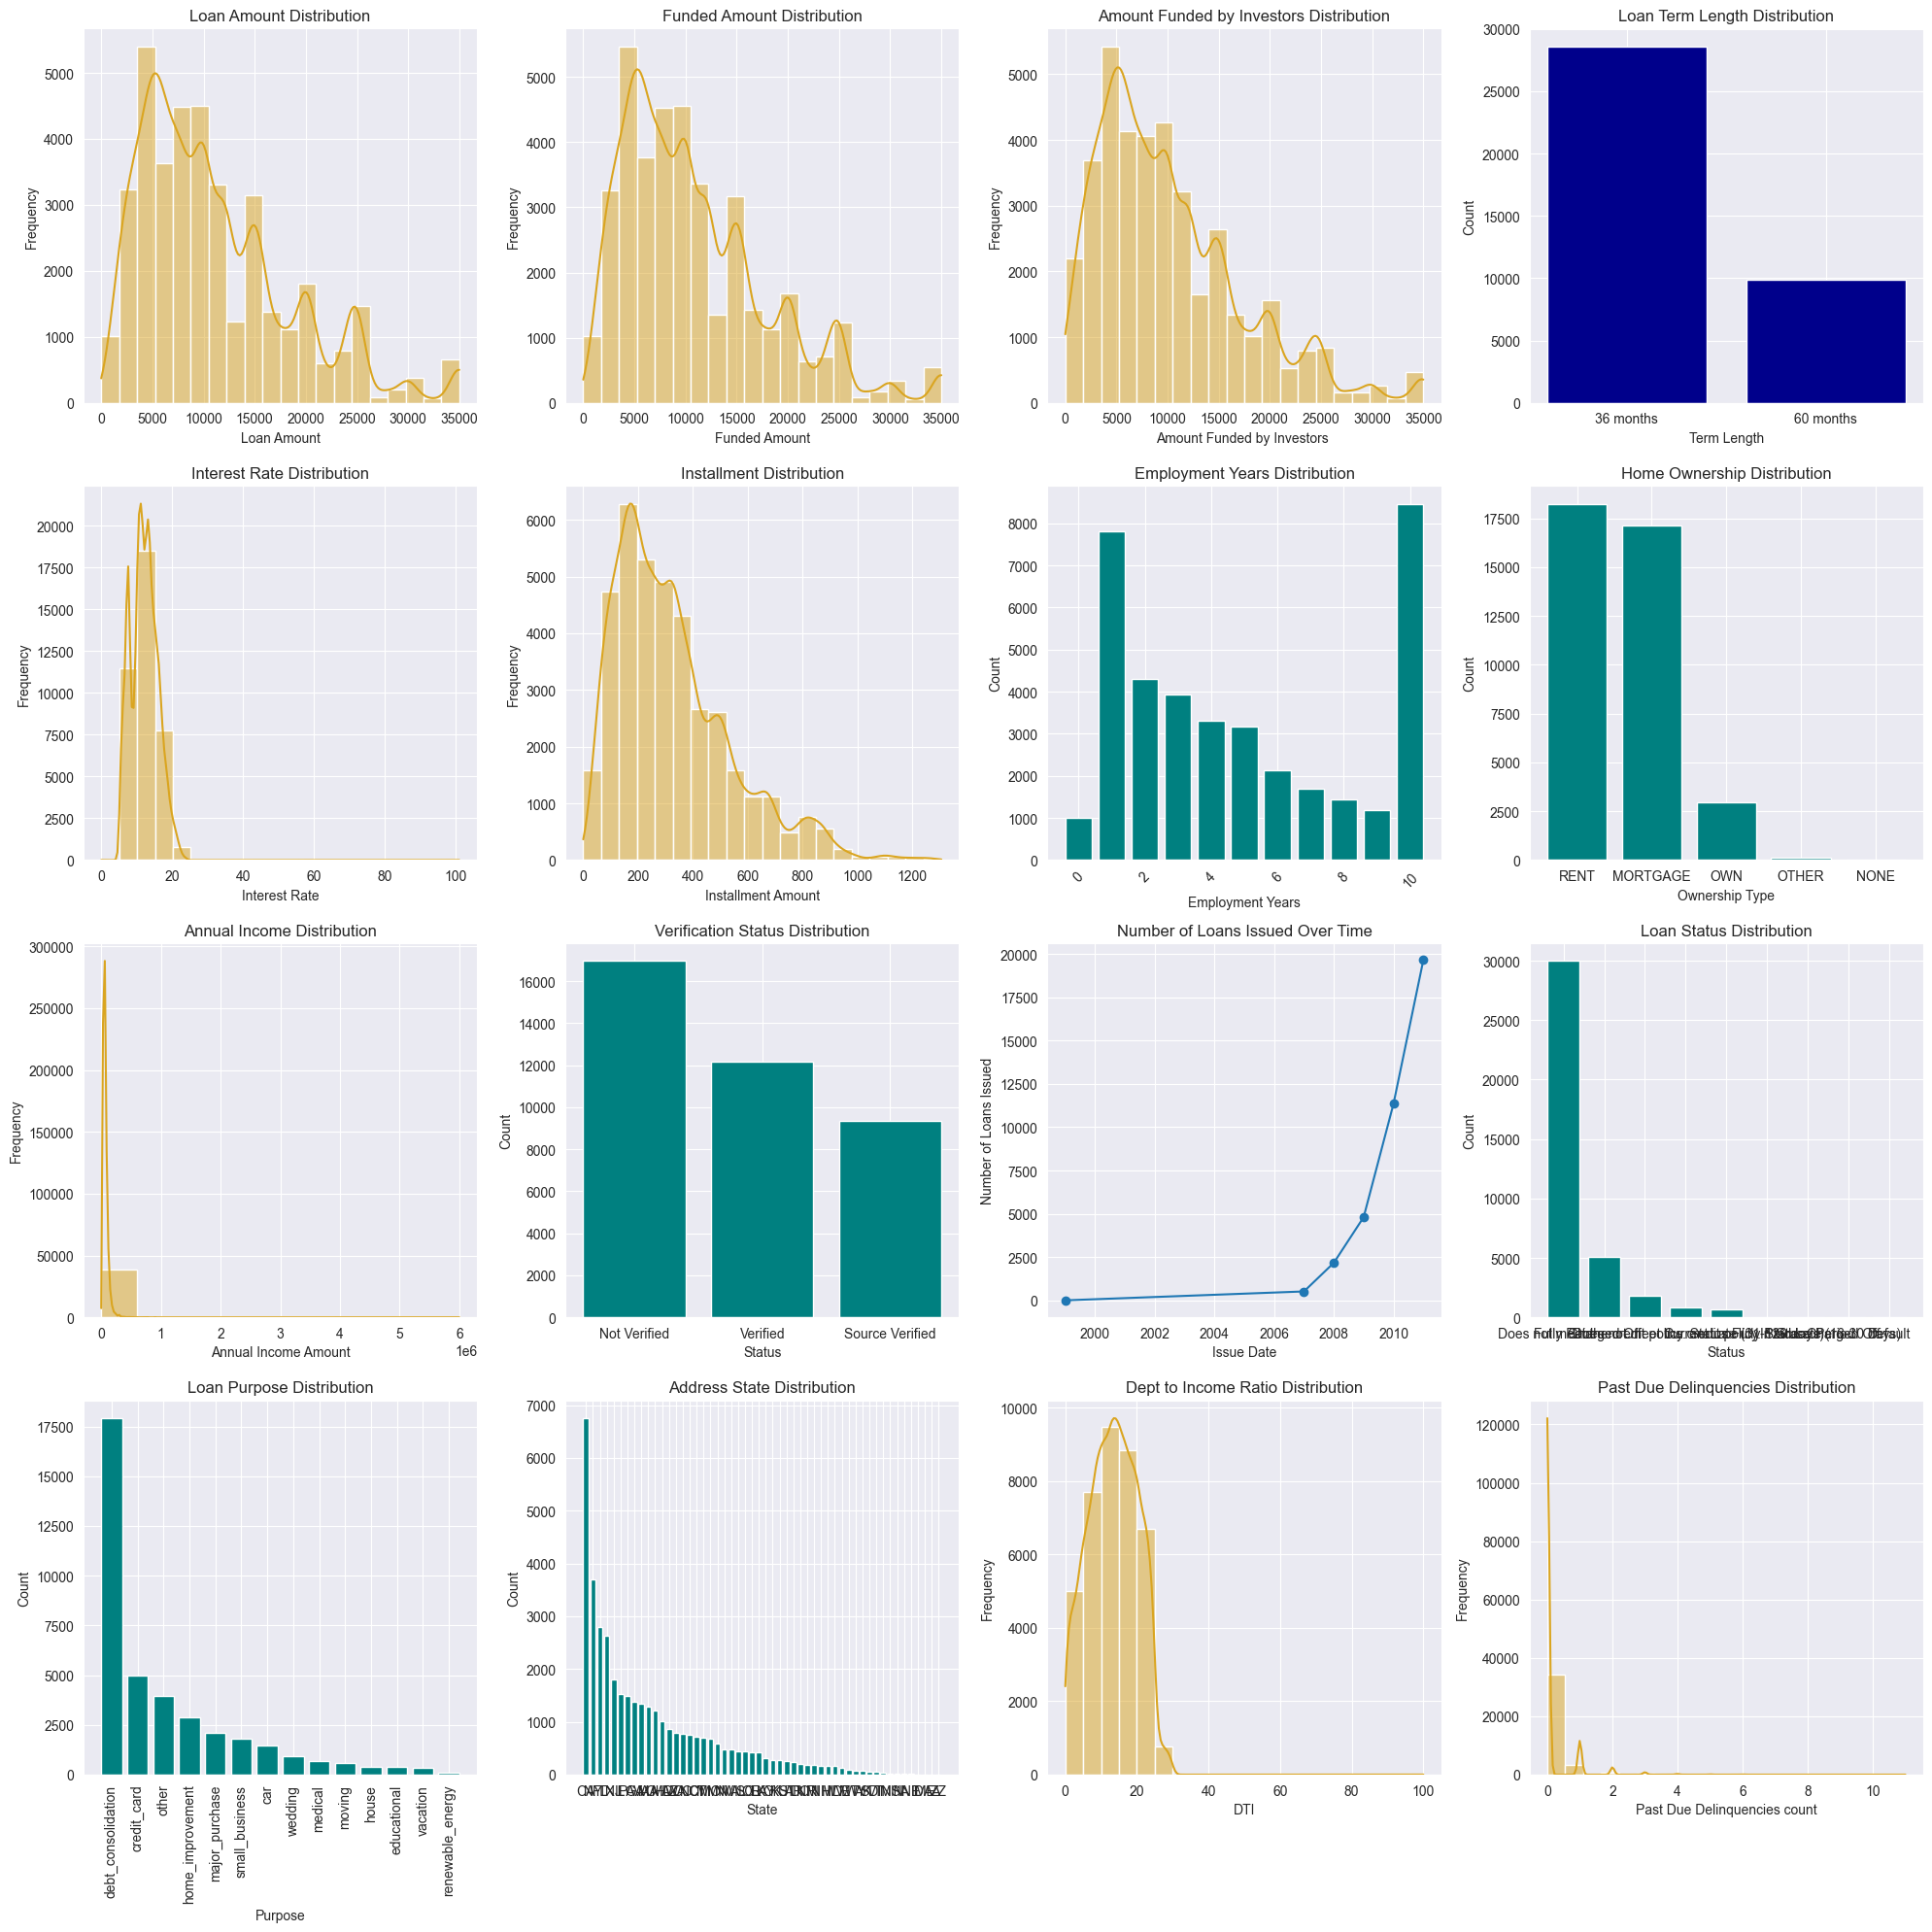

In [6]:
# Feature Visualization
fig, axes = plt.subplots(4, 4, figsize=(20,20))

# Loan Amount Distribution
sns.histplot(data=df, x='loan_amnt', bins=20, kde=True, color='goldenrod', ax=axes[0, 0])
axes[0, 0].set_title('Loan Amount Distribution')
axes[0, 0].set_xlabel('Loan Amount')
axes[0, 0].set_ylabel('Frequency')

# Funded Amount Distribution
sns.histplot(data=df, x='funded_amnt', bins=20, kde=True, color='goldenrod', ax=axes[0, 1])
axes[0, 1].set_title('Funded Amount Distribution')
axes[0, 1].set_xlabel('Funded Amount')
axes[0, 1].set_ylabel('Frequency')

# Amount Funded by Investors Distribution
sns.histplot(data=df, x='funded_amnt_inv', bins=20, kde=True, color='goldenrod', ax=axes[0, 2])
axes[0, 2].set_title('Amount Funded by Investors Distribution')
axes[0, 2].set_xlabel('Amount Funded by Investors ')
axes[0, 2].set_ylabel('Frequency')

# Loan Term Length Distribution
term_counts = df['term'].value_counts()
axes[0, 3].bar(term_counts.index, term_counts.values, color='darkblue')
axes[0, 3].set_title('Loan Term Length Distribution')
axes[0, 3].set_xlabel('Term Length')
axes[0, 3].set_ylabel('Count')

# Interest Rate Distribution
sns.histplot(data=df, x='int_rate', bins=20, kde=True, color='goldenrod', ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate Distribution')
axes[1, 0].set_xlabel('Interest Rate')
axes[1, 0].set_ylabel('Frequency')

# Installment Distribution
sns.histplot(data=df, x='installment', bins=20, kde=True, color='goldenrod', ax=axes[1, 1])
axes[1, 1].set_title('Installment Distribution')
axes[1, 1].set_xlabel('Installment Amount')
axes[1, 1].set_ylabel('Frequency')

# Employment Years Distribution
emp_length_counts = df['emp_length'].value_counts().sort_index()
axes[1, 2].bar(emp_length_counts.index, emp_length_counts.values, color='teal')
axes[1, 2].set_title('Employment Years Distribution')
axes[1, 2].set_xlabel('Employment Years')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

# Home Ownership Distribution
home_ownership_counts = df['home_ownership'].value_counts()
axes[1, 3].bar(home_ownership_counts.index, home_ownership_counts.values, color='teal')
axes[1, 3].set_title('Home Ownership Distribution')
axes[1, 3].set_xlabel('Ownership Type')
axes[1, 3].set_ylabel('Count')

# Annual Income Distribution
sns.histplot(data=df, x='annual_inc', bins=10, kde=True, color='goldenrod', ax=axes[2, 0])
axes[2, 0].set_title('Annual Income Distribution')
axes[2, 0].set_xlabel('Annual Income Amount')
axes[2, 0].set_ylabel('Frequency')

# Verification Status Distribution
verification_status_counts = df['verification_status'].value_counts()
axes[2, 1].bar(verification_status_counts.index, verification_status_counts.values, color='teal')
axes[2, 1].set_title('Verification Status Distribution')
axes[2, 1].set_xlabel('Status')
axes[2, 1].set_ylabel('Count')

# Number of Loans Issued Over Time
yearly_loan_counts = df.groupby(df['issue_d'].dt.year)['issue_d'].count()
axes[2, 2].plot(yearly_loan_counts, marker='o', linestyle='-')
axes[2, 2].set_title('Number of Loans Issued Over Time')
axes[2, 2].set_xlabel('Issue Date')
axes[2, 2].set_ylabel('Number of Loans Issued')

# Loan Status Distribution
loan_status_counts = df['loan_status'].value_counts()
axes[2, 3].bar(loan_status_counts.index, loan_status_counts.values, color='teal')
axes[2, 3].set_title('Loan Status Distribution')
axes[2, 3].set_xlabel('Status')
axes[2, 3].set_ylabel('Count')

# Loan Purpose Distribution
purpose_counts = df['purpose'].value_counts()
axes[3, 0].bar(purpose_counts.index, purpose_counts.values, color='teal')
axes[3, 0].set_title('Loan Purpose Distribution')
axes[3, 0].set_xlabel('Purpose')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x', rotation=90)

# Address State Distribution
addr_state_counts = df['addr_state'].value_counts()
axes[3, 1].bar(addr_state_counts.index, addr_state_counts.values, color='teal')
axes[3, 1].set_title('Address State Distribution')
axes[3, 1].set_xlabel('State')
axes[3, 1].set_ylabel('Count')

# Dept to Income Ratio (DTI) Distribution
sns.histplot(data=df, x='dti', bins=20, kde=True, color='goldenrod', ax=axes[3, 2])
axes[3, 2].set_title('Dept to Income Ratio Distribution')
axes[3, 2].set_xlabel('DTI')
axes[3, 2].set_ylabel('Frequency')

# Past Due Delinquencies Distribution
sns.histplot(data=df, x='delinq_2yrs', bins=20, kde=True, color='goldenrod', ax=axes[3, 3])
axes[3, 3].set_title('Past Due Delinquencies Distribution')
axes[3, 3].set_xlabel('Past Due Delinquencies count')
axes[3, 3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
# Missing value percentage
null_percentages = (df.isna().sum() / len(df)) * 100
null_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})
null_df['Null Percentage'] = null_df['Null Percentage'].astype(int)
sorted_null_df = null_df.sort_values(by='Null Percentage', ascending=False)
sorted_null_df.head().style.background_gradient(cmap='turbo')

,Column,Null Percentage
33,next_pymnt_d,91
21,mths_since_last_delinq,63
0,id,0
26,total_acc,0
20,inq_last_6mths,0


In [8]:
# Handling missing values
# Drop columns with null value percentages over 40%
df.drop(sorted_null_df[sorted_null_df['Null Percentage'] >= 40]['Column'], axis=1, inplace=True)
# Drop rows with any remaining null values
df.dropna(inplace=True)

print(f"Number of rows: {df.shape[0]}")

Number of rows: 38346


In [9]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.select_dtypes(include='object').head()

,term,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,revol_util
2,36 months,RENT,Not Verified,Charged Off,major_purchase,000xx,ZZ,0.00%
3,36 months,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,21.30%
4,36 months,RENT,Not Verified,Charged Off,debt_consolidation,115xx,NY,99.90%
5,36 months,MORTGAGE,Not Verified,Fully Paid,other,751xx,TX,47.20%
6,36 months,RENT,Not Verified,Fully Paid,debt_consolidation,112xx,NY,0%


In [11]:
# Print the number of unique values for each categorical column
categorical_columns = ['term', 'home_ownership', 'verification_status', 'purpose', 'zip_code', 'addr_state']
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_count}")

Number of unique values in term: 2
Number of unique values in home_ownership: 5
Number of unique values in verification_status: 3
Number of unique values in purpose: 14
Number of unique values in zip_code: 832
Number of unique values in addr_state: 51


In [12]:
# Apply one-hot encoding to the selected columns
df = pd.get_dummies(df, columns=[col for col in categorical_columns if df[col].nunique() <= 50], drop_first=True)

print("Shape of encoded DataFrame:", df.shape)

Shape of encoded DataFrame: (38346, 50)


### Artificial Neural Network (ANN)
   * Checking data for imbalance.
   * Down sampling the data set.
   * Scaling numeric features using Min-max method.
   * Splitting data to train set and test set.
   * Converting data to tensor format.
   * Dividing the data into batches for cross-validation.
   * Defining network architecture with the appropriate activations.
   * Choosing the appropriate loss function and optimization algorithm.
   * Training the model on the training set.
   * Evaluating the model using different metrics and visualizing the results.

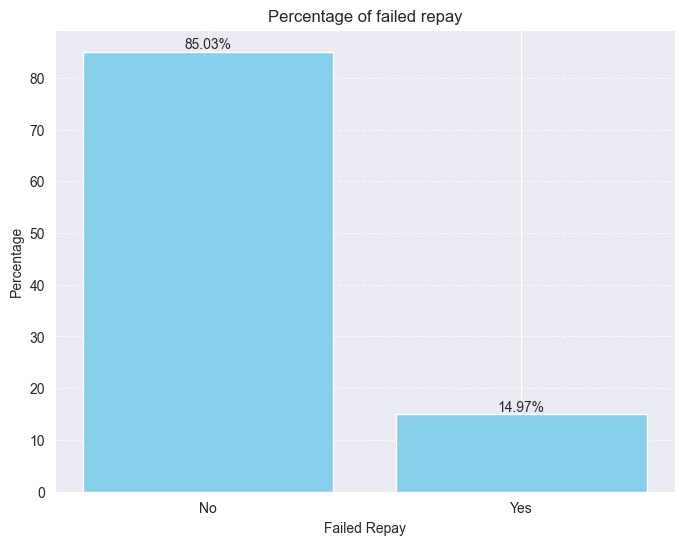

In [13]:
# Check for imbalanced in class distribution
repay_fail_counts = df['repay_fail'].value_counts()

total_count = repay_fail_counts.sum()
percentage = (repay_fail_counts / total_count) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(percentage.index, percentage.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Percentage of failed repay')
plt.xlabel('Failed Repay')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Resampling classes to balance the data
majority_class = df[df['repay_fail'] == 0]
minority_class = df[df['repay_fail'] == 1]

downsampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
df = pd.concat([downsampled_majority, minority_class])

print('Failed Repay Classes count:\n', df['repay_fail'].value_counts())

Failed Repay Classes count:
 repay_fail
0    5740
1    5740
Name: count, dtype: int64


In [15]:
# Scaling features
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [16]:
# Splitting the data into features and target variable
X = df.select_dtypes(include='number').drop(["repay_fail"], axis=1)  # Features
y = df["repay_fail"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Convert NumPy arrays to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tensor, y_test_tensor))

# Shuffle and batch the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the neural network architecture
ann_classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001))
])


# Define precision and recall metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compile the model with custom metrics
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])

# Train the model
ann_classifier.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Make predictions
y_pred_probabilities = ann_classifier.predict(test_dataset)
y_pred_ann = (y_pred_probabilities > 0.5).astype(int)

Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7924 - loss: 2.3288 - precision: 0.7746 - recall: 0.8484 - val_accuracy: 0.9573 - val_loss: 0.5229 - val_precision: 0.9336 - val_recall: 0.9821
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.4977 - precision: 0.9784 - recall: 0.9278 - val_accuracy: 0.9682 - val_loss: 0.4360 - val_precision: 0.9547 - val_recall: 0.9812
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9584 - loss: 0.4186 - precision: 0.9832 - recall: 0.9343 - val_accuracy: 0.9769 - val_loss: 0.3651 - val_precision: 0.9944 - val_recall: 0.9579
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.3693 - precision: 0.9907 - recall: 0.9433 - val_accuracy: 0.9695 - val_loss: 0.3332 - val_precision: 0.9962 - val_recall: 0.9409
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.3374 - precision: 0.9944 - recall: 0.9477 - val_accuracy: 0.9778 - val_loss: 0.

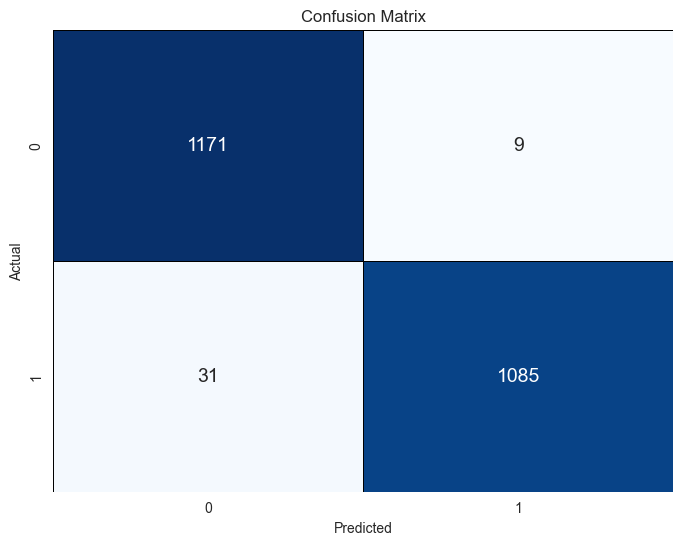


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1180
         1.0       0.99      0.97      0.98      1116

    accuracy                           0.98      2296
   macro avg       0.98      0.98      0.98      2296
weighted avg       0.98      0.98      0.98      2296



In [18]:
# Compute confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))